# Naive Bayes<br>
Dataset: Dry Beans

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report, ConfusionMatrixDisplay, confusion_matrix

## Describing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/decision_trees/data/Dry_Bean_Dataset.csv')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
df.shape

(13611, 17)

In [ ]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## Checking Null values

In [ ]:
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [ ]:
df['Area'] = df['Area'].astype(float)
df['ConvexArea'] = df['ConvexArea'].astype(float)

## Visualizing Data

In [ ]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

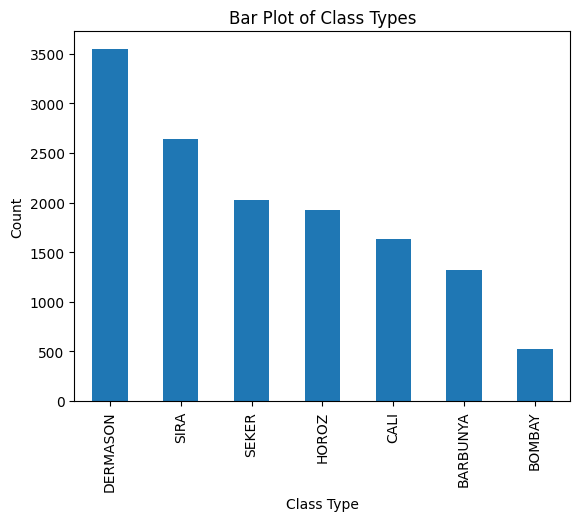

In [ ]:
class_counts = df['Class'].value_counts()
class_counts.plot(kind='bar')
plt.title('Bar Plot of Class Types')
plt.xlabel('Class Type')
plt.ylabel('Count')
plt.show()

## Scaling

In [ ]:
std_scaler = StandardScaler()

In [ ]:
features_to_scale = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter']
for feature in features_to_scale:
    df[feature] = std_scaler.fit_transform(df[feature].values.reshape(-1, 1))

In [ ]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.840749,-1.143319,-1.306598,-0.631153,1.197191,0.549812,-0.841451,-1.063341,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,-0.829188,-1.013924,-1.395911,-0.434445,1.097356,0.411785,-0.826102,-1.044217,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,-0.807157,-1.078829,-1.252357,-0.585735,1.209713,0.562727,-0.808704,-1.008084,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,-0.785741,-0.977215,-1.278825,-0.439290,1.153638,0.498616,-0.773975,-0.973337,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,-0.781239,-1.097384,-1.380471,-0.266663,1.060798,0.333680,-0.784286,-0.966080,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,13611.000000,13611.000000,1.361100e+04,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,3.341028e-17,6.682056e-17,2.672823e-16,2.338720e-16,1.583242,0.750895,1.002308e-16,0.000000,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,0.246678,0.092002,1.000037e+00,1.000037,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,-1.112719e+00,-1.542583e+00,-1.593407e+00,-1.773645e+00,1.024868,0.218951,-1.111184e+00,-1.551678,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,-5.702102e-01,-7.082260e-01,-7.799910e-01,-5.875797e-01,1.432307,0.715928,-5.727750e-01,-0.642100,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,-2.863377e-01,-2.816033e-01,-2.714228e-01,-2.187975e-01,1.551124,0.764441,-2.885152e-01,-0.247169,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,2.824987e-01,5.690149e-01,6.576317e-01,3.282530e-01,1.707109,0.810466,2.863522e-01,0.445835,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,6.874044e+00,5.273833e+00,4.886372e+00,5.735751e+00,2.430306,0.911423,7.036141e+00,5.345339,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## Categorical to Numerical

In [ ]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [ ]:
le_object = LabelEncoder()

In [ ]:
df['Class'] = le_object.fit_transform(df['Class'])
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.840749,-1.143319,-1.306598,-0.631153,1.197191,0.549812,-0.841451,-1.063341,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,-0.829188,-1.013924,-1.395911,-0.434445,1.097356,0.411785,-0.826102,-1.044217,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,-0.807157,-1.078829,-1.252357,-0.585735,1.209713,0.562727,-0.808704,-1.008084,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,-0.785741,-0.977215,-1.278825,-0.439290,1.153638,0.498616,-0.773975,-0.973337,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,-0.781239,-1.097384,-1.380471,-0.266663,1.060798,0.333680,-0.784286,-0.966080,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


## Seperating Dependent-Independent Variables

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.840749,-1.143319,-1.306598,-0.631153,1.197191,0.549812,-0.841451,-1.063341,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,-0.829188,-1.013924,-1.395911,-0.434445,1.097356,0.411785,-0.826102,-1.044217,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,-0.807157,-1.078829,-1.252357,-0.585735,1.209713,0.562727,-0.808704,-1.008084,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,-0.785741,-0.977215,-1.278825,-0.439290,1.153638,0.498616,-0.773975,-0.973337,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,-0.781239,-1.097384,-1.380471,-0.266663,1.060798,0.333680,-0.784286,-0.966080,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,-0.373471,-0.446083,-0.366669,-0.363055,1.552728,0.765002,-0.378191,-0.364148,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,-0.373334,-0.456336,-0.450053,-0.257015,1.476439,0.735702,-0.378662,-0.363962,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,-0.372038,-0.447833,-0.450478,-0.246456,1.472582,0.734065,-0.376143,-0.362197,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,-0.371765,-0.427029,-0.428974,-0.266742,1.489326,0.741055,-0.372851,-0.361825,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [ ]:
y

0        5
1        5
2        5
3        5
4        5
        ..
13606    3
13607    3
13608    3
13609    3
13610    3
Name: Class, Length: 13611, dtype: int64

## Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
X_train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
2108,0.036310,0.081843,0.087384,0.189291,1.554348,0.765567,0.029650,0.159216,0.717755,0.990156,0.892609,0.801166,0.006055,0.001539,0.641866,0.997684
10212,-0.976410,-1.158808,-0.966347,-1.575275,1.805745,0.832658,-0.975024,-1.296906,0.755523,0.987024,0.832846,0.742917,0.009720,0.001826,0.551925,0.996636
8878,-0.269457,-0.222648,-0.125051,-0.348990,1.658435,0.797758,-0.272494,-0.224896,0.788980,0.988873,0.869910,0.774841,0.006854,0.001524,0.600378,0.995688
9842,-0.065931,0.002877,-0.010620,0.059915,1.557494,0.766657,-0.071445,0.034589,0.680010,0.989814,0.876823,0.799140,0.006245,0.001571,0.638625,0.994655
8122,-0.384486,-0.440996,-0.407875,-0.340258,1.525330,0.755112,-0.388469,-0.379186,0.713171,0.989858,0.906966,0.808673,0.006827,0.001801,0.653951,0.997492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,1.030512,1.224997,1.497611,0.788917,1.886348,0.847920,1.016389,1.225843,0.797239,0.990908,0.837465,0.726026,0.005386,0.000923,0.527113,0.994319
13418,-0.449861,-0.466169,-0.426161,-0.507908,1.580685,0.774448,-0.451343,-0.469661,0.692154,0.988272,0.877748,0.794264,0.007116,0.001747,0.630855,0.997183
5390,1.260297,1.406165,1.595202,1.113733,1.810303,0.833583,1.243435,1.444142,0.783939,0.991343,0.845485,0.741012,0.005076,0.000944,0.549099,0.994035
860,-0.498662,-0.671412,-0.857094,-0.082613,1.242455,0.593467,-0.502764,-0.538625,0.752094,0.990386,0.954097,0.896612,0.006420,0.002559,0.803913,0.998826


In [ ]:
X_train.shape

(10208, 16)

In [ ]:
y_train

2108     0
10212    3
8878     6
9842     6
8122     6
        ..
5191     2
13418    3
5390     2
860      5
7270     4
Name: Class, Length: 10208, dtype: int64

In [ ]:
y_train.shape

(10208,)

In [ ]:
X_test.shape

(3403, 16)

In [ ]:
y_test.shape

(3403,)

## Saving Cleaned DFs to CSV files

In [ ]:
X_train.to_csv('./X_train.csv')
y_train.to_csv('./y_train.csv')
X_test.to_csv('./X_test.csv')
y_test.to_csv('./y_test.csv')

## Modelling

In [ ]:
gnb_classifier = GaussianNB()

In [ ]:
gnb_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb_classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8995004407875404

In [ ]:
precision_score(y_test, y_pred, average = 'weighted')

0.9010090341750112

In [ ]:
recall_score(y_test, y_pred, average = 'weighted')

0.8995004407875404

In [ ]:
f1_score(y_test, y_pred, average = 'weighted')

0.8995079636680644

In [ ]:
target_names = ['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']

In [ ]:
print(classification_report(y_true = y_test, y_pred = y_pred, target_names = target_names))

              precision    recall  f1-score   support

       SEKER       0.86      0.80      0.83       344
    BARBUNYA       1.00      1.00      1.00       142
      BOMBAY       0.86      0.90      0.88       402
        CALI       0.93      0.86      0.89       851
       HOROZ       0.96      0.97      0.96       486
        SIRA       0.93      0.95      0.94       513
    DERMASON       0.83      0.89      0.86       665

    accuracy                           0.90      3403
   macro avg       0.91      0.91      0.91      3403
weighted avg       0.90      0.90      0.90      3403



In [ ]:
confusion_matrix(y_test, y_pred)

array([[276,   0,  53,   0,   1,   2,  12],
       [  0, 142,   0,   0,   0,   0,   0],
       [ 33,   0, 361,   0,   5,   1,   2],
       [  0,   0,   0, 733,   0,  25,  93],
       [  1,   0,   6,   6, 469,   0,   4],
       [  7,   0,   0,   5,   0, 487,  14],
       [  5,   0,   0,  43,  16,   8, 593]])

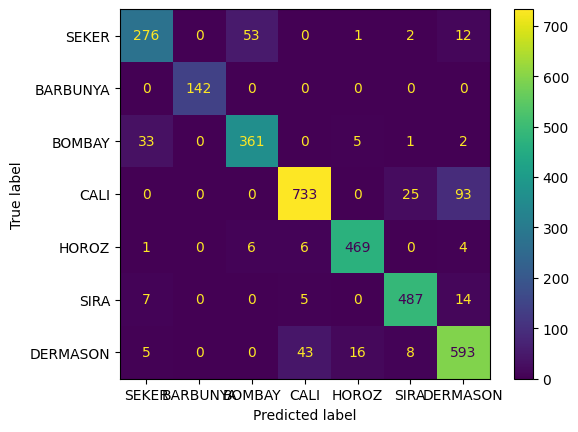

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    gnb_classifier,
    X_test,
    y_test,
    display_labels=target_names,
)